Data preprocessing stage


In [ ]:
channels = ['ndtv', 'indiatoday', 'wion']
data = {}

for c in (channels):
  with open("/content/" + c + ".txt", "rb") as file:
    data[c] = [file.read().decode("utf-8") ]
    

In [ ]:
import pandas as pd
pd.set_option('max_colwidth',150)
data_df = pd.DataFrame.from_dict(data).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

,transcript
indiatoday,okay we're getting in some news that\r\nthere are reports that suggest J\r\nlalita's health to be worsening now\r\naccording to two tunnel channel...
ndtv,now last week a minister from Tamilnadu\r\nconfessed that he and his colleagues\r\nlied about gelas health none saw her but\r\nthey said they spen...
wion,[Music]\r\n\r\nhe was coming in from in there in the\r\n\r\nstate of Tamil Nadu where Chief Minister\r\n\r\nI Palani saw me and said that Inquiry\...


In [ ]:
data_df.transcript.loc['ndtv']

"now last week a minister from Tamilnadu\r\nconfessed that he and his colleagues\r\nlied about gelas health none saw her but\r\nthey said they spent stories that she\r\nate atleast in hospital and was\r\nrecovering now another minister says he\r\ndid see her\r\nI made these conflicting claims over\r\nJoella littles death who mystery the\r\nstate government has announced that a\r\none-man committee has been appointed and\r\nwill be probing the circumstances\r\nleading to jll it has hospitalization\r\nand death and annual reports one year\r\nafter Jirga Lita was admitted to\r\nChennai's up in the hospital a bizarre\r\ncontroversy first Tamil Nadu forest\r\nminister said no cabinet colleague or\r\nvisiting dignitary saw gerrera leta in\r\nhospital the textiles minister had\r\nendorsed that now cooperatives minister\r\nseller Raju says that's not true he had\r\nmet her and so had others na mano a\r\nMarley party lammeter important\r\nministers Srinivasan and we Ramana say\r\nthey had been 

In [ ]:
import re
import string
def clean_text_round1(text):
  text = text.lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '',text)
  text = re.sub('\w*\d\w*', '', text)
  return text

In [ ]:
round1 = lambda x: clean_text_round1(x)
data_clean = pd.DataFrame(data_df.transcript.apply(round1))

In [ ]:
def clean_text_round2(text):
  text = re.sub('[‘’“”...]', '', text)
  text = re.sub('\n', '', text)
  return text

In [ ]:
round2 = lambda x: clean_text_round2(x)
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))
data_df.to_pickle("corpus.pkl")


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(),
columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,able,absolutely,abstraction,according,accurate,achievement,actually,add,admitted,afraid,...,world,worse,worsened,worsening,worst,wrong,yeah,year,yes,youre
indiatoday,2,3,0,2,1,0,6,1,0,1,...,1,1,1,1,2,2,1,0,2,1
ndtv,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
wion,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import pickle
data_dtm.to_pickle("dtm.pkl")
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

In [ ]:
import pandas as pd
data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,indiatoday,ndtv,wion
able,2,0,0
absolutely,3,0,0
abstraction,0,0,1
according,2,0,0
accurate,1,0,0


In [ ]:
top_dict = {}
for c in data.columns:
  top = data[c].sort_values(ascending=False).head(30)
  top_dict[c]= list(zip(top.index, top.values))
top_dict

{'indiatoday': [('know', 19),
  ('just', 18),
  ('people', 17),
  ('hospital', 15),
  ('right', 13),
  ('feel', 9),
  ('emotions', 8),
  ('channels', 7),
  ('situation', 7),
  ('apollo', 7),
  ('chief', 7),
  ('away', 6),
  ('getting', 6),
  ('passed', 6),
  ('police', 6),
  ('today', 6),
  ('news', 6),
  ('heard', 6),
  ('thats', 6),
  ('actually', 6),
  ('like', 5),
  ('official', 5),
  ('reports', 5),
  ('things', 4),
  ('tell', 4),
  ('tamil', 4),
  ('sense', 4),
  ('okay', 4),
  ('officially', 4),
  ('condition', 4)],
 'ndtv': [('minister', 7),
  ('hospital', 6),
  ('did', 4),
  ('death', 3),
  ('saw', 3),
  ('chief', 2),
  ('mystery', 2),
  ('says', 2),
  ('cabinet', 2),
  ('ate', 2),
  ('recovering', 2),
  ('said', 2),
  ('time', 2),
  ('health', 2),
  ('party', 2),
  ('ministers', 2),
  ('government', 2),
  ('joy', 2),
  ('daniel', 1),
  ('pieces', 1),
  ('tamil', 1),
  ('italy', 1),
  ('leading', 1),
  ('swamy', 1),
  ('delica', 1),
  ('sukumar', 1),
  ('points', 1),
  ('dente

In [ ]:
for channel, top_words in top_dict.items():
  print(channel)
  print(', '.join([word for word, count in top_words[0:20]]))
  print('---')

indiatoday
know, just, people, hospital, right, feel, emotions, channels, situation, apollo, chief, away, getting, passed, police, today, news, heard, thats, actually
---
ndtv
minister, hospital, did, death, saw, chief, mystery, says, cabinet, ate, recovering, said, time, health, party, ministers, government, joy, daniel, pieces
---
wion
chief, minister, group, support, general, means, demands, point, nadu, latest, tamil, moment, main, death, secretary, demand, want, things, say, statement
---


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
add_stop_words=stop_words
add_stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [ ]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
data_clean = pd.read_pickle('data_clean.pkl')
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


EDA- Exploratory data analysis


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
max_font_size=150, random_state=42)

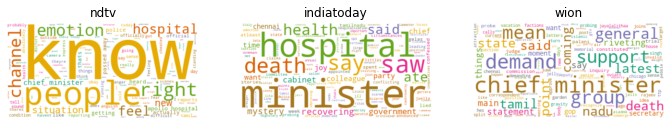

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 6]
full_names = ['ndtv', 'indiatoday', 'wion']
for index, comedian in enumerate(data.columns):
  wc.generate(data_clean.transcript[comedian])
  plt.subplot(3, 4, index+1)
  plt.imshow(wc, interpolation="bilinear")
  plt.axis("off")
  plt.title(full_names[index])
plt.show()

In [ ]:
import pandas as pd
data = pd.read_pickle('corpus.pkl')
data

,transcript
indiatoday,okay we're getting in some news that\r\nthere are reports that suggest J\r\nlalita's health to be worsening now\r\naccording to two tunnel channel...
ndtv,now last week a minister from Tamilnadu\r\nconfessed that he and his colleagues\r\nlied about gelas health none saw her but\r\nthey said they spen...
wion,[Music]\r\n\r\nhe was coming in from in there in the\r\n\r\nstate of Tamil Nadu where Chief Minister\r\n\r\nI Palani saw me and said that Inquiry\...


In [ ]:
from textblob import TextBlob
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity
data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,polarity,subjectivity
indiatoday,okay we're getting in some news that\r\nthere are reports that suggest J\r\nlalita's health to be worsening now\r\naccording to two tunnel channel...,0.045910,0.477945
ndtv,now last week a minister from Tamilnadu\r\nconfessed that he and his colleagues\r\nlied about gelas health none saw her but\r\nthey said they spen...,0.130556,0.352222
wion,[Music]\r\n\r\nhe was coming in from in there in the\r\n\r\nstate of Tamil Nadu where Chief Minister\r\n\r\nI Palani saw me and said that Inquiry\...,0.158387,0.467149


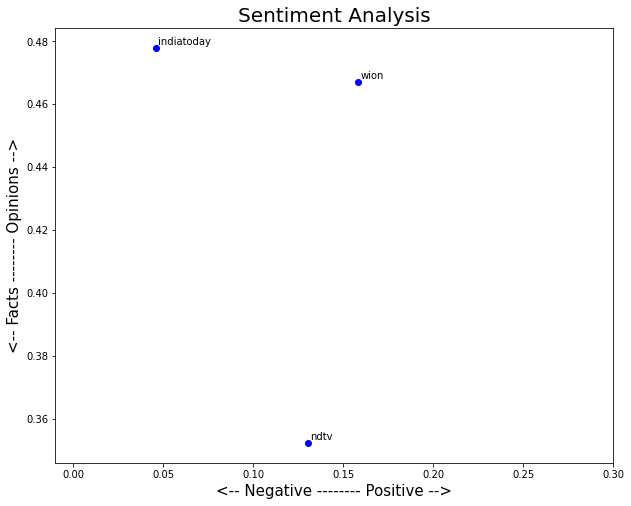

In [ ]:
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]
for index, channel in enumerate(data.index):
  x = data.polarity.loc[channel]
  y = data.subjectivity.loc[channel]
  plt.scatter(x, y, color='blue')
  plt.text(x+.001, y+.001, channel, fontsize=10)
  plt.xlim(-.01, .30)
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)
plt.show()

In [ ]:
import numpy as np
import math
def split_text(text, n=10):

    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    split_list = []
    for piece in range(n):
      split_list.append(text[start[piece]:start[piece]+size])
      return split_list

In [ ]:
data

,transcript,polarity,subjectivity
indiatoday,okay we're getting in some news that\r\nthere are reports that suggest J\r\nlalita's health to be worsening now\r\naccording to two tunnel channel...,0.045910,0.477945
ndtv,now last week a minister from Tamilnadu\r\nconfessed that he and his colleagues\r\nlied about gelas health none saw her but\r\nthey said they spen...,0.130556,0.352222
wion,[Music]\r\n\r\nhe was coming in from in there in the\r\n\r\nstate of Tamil Nadu where Chief Minister\r\n\r\nI Palani saw me and said that Inquiry\...,0.158387,0.467149


In [ ]:
list_pieces = []
for t in data.transcript:
  split = split_text(t)
  list_pieces.append(split)
list_pieces

[["okay we're getting in some news that\r\nthere are reports that suggest J\r\nlalita's health to be worsening now\r\naccording to two tunnel channels they\r\nsay that J Lolita the chief minister of\r\ntamil nadu is no more that's according\r\nto the reports coming in from these two\r\nchannels in the state giving out reports\r\nof the Chief Minister's death now we\r\nhaven't really heard officially from the\r\nApollo hospital the last move that we\r\nheard was through the official medical\r\nbulletin that said that the condition of\r\nthe chief minister is very critical\r\nwe also last heard that a team of\r\nspecialists from Ames have already\r\nreached the Apolo Hospital let's just go\r\nstraight across to consulting editor\r\nIndia today Rajdeep Sardesai asleep what\r\ndo you make of this news I mean could\r\nthis just be you know a channel jumping\r\nthe gun because we haven't heard\r\nanything officially from the hospital\r\njust as yet well given the sensitivity\r\nof the situat

Topic modelling


In [ ]:
import pandas as pd
import pickle
data = pd.read_pickle('dtm_stop.pkl')
data

,able,absolutely,abstraction,according,accurate,achievement,actually,add,admitted,afraid,...,world,worse,worsened,worsening,worst,wrong,yeah,year,yes,youre
indiatoday,2,3,0,2,1,0,6,1,0,1,...,1,1,1,1,2,2,1,0,2,1
ndtv,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
wion,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from gensim import matutils, models
import scipy.sparse

In [ ]:
tdm = data.transpose()
tdm.head()

,indiatoday,ndtv,wion
able,2,0,0
absolutely,3,0,0
abstraction,0,0,1
according,2,0,0
accurate,1,0,0


In [ ]:
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [ ]:
cv = pickle.load(open("cv_stop.pkl", "rb"))
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [ ]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)
lda.print_topics()

[(0,
  '0.019*"hospital" + 0.017*"know" + 0.016*"people" + 0.012*"right" + 0.009*"minister" + 0.008*"chief" + 0.008*"feel" + 0.007*"emotions" + 0.006*"thats" + 0.006*"apollo"'),
 (1,
  '0.014*"chief" + 0.014*"minister" + 0.010*"group" + 0.008*"support" + 0.008*"demands" + 0.008*"means" + 0.008*"general" + 0.006*"tamil" + 0.006*"say" + 0.006*"things"')]

In [ ]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=10)
lda.print_topics()


[(0,
  '0.018*"chief" + 0.018*"minister" + 0.012*"group" + 0.009*"support" + 0.009*"means" + 0.009*"general" + 0.009*"demands" + 0.007*"say" + 0.007*"things" + 0.007*"tamil"'),
 (1,
  '0.020*"minister" + 0.018*"hospital" + 0.009*"death" + 0.009*"saw" + 0.007*"chief" + 0.007*"said" + 0.007*"ministers" + 0.007*"party" + 0.006*"health" + 0.006*"time"'),
 (2,
  '0.021*"know" + 0.019*"people" + 0.017*"hospital" + 0.015*"right" + 0.010*"feel" + 0.009*"emotions" + 0.008*"situation" + 0.008*"chief" + 0.008*"apollo" + 0.008*"channels"')]

In [ ]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=5, passes=10)
lda.print_topics()

[(0,
  '0.002*"hospital" + 0.002*"minister" + 0.002*"know" + 0.002*"chief" + 0.002*"people" + 0.002*"right" + 0.002*"said" + 0.002*"thats" + 0.002*"reports" + 0.002*"feel"'),
 (1,
  '0.022*"chief" + 0.022*"minister" + 0.015*"group" + 0.012*"support" + 0.012*"demands" + 0.012*"general" + 0.012*"means" + 0.008*"death" + 0.008*"said" + 0.008*"want"'),
 (2,
  '0.026*"minister" + 0.022*"hospital" + 0.011*"saw" + 0.011*"death" + 0.008*"chief" + 0.008*"ministers" + 0.008*"health" + 0.008*"party" + 0.008*"time" + 0.008*"says"'),
 (3,
  '0.023*"know" + 0.021*"people" + 0.018*"hospital" + 0.016*"right" + 0.011*"feel" + 0.010*"emotions" + 0.009*"chief" + 0.009*"situation" + 0.009*"apollo" + 0.009*"channels"'),
 (4,
  '0.002*"hospital" + 0.002*"people" + 0.002*"right" + 0.002*"know" + 0.002*"chief" + 0.002*"emotions" + 0.002*"feel" + 0.002*"getting" + 0.002*"heard" + 0.002*"minister"')]

In [ ]:
from nltk import word_tokenize, pos_tag

# New Section

In [ ]:
def nouns_adj(text):
  '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
  is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
  tokenized = word_tokenize(text)
  nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)]
  return ' '.join(nouns_adj)


In [ ]:
data_clean = pd.read_pickle('data_clean.pkl')
data_clean

,transcript
indiatoday,okay were getting in some news that\rthere are reports that suggest j\rlalitas health to be worsening now\raccording to two tunnel channels they\r...
ndtv,now last week a minister from tamilnadu\rconfessed that he and his colleagues\rlied about gelas health none saw her but\rthey said they spent stor...
wion,\r\rhe was coming in from in there in the\r\rstate of tamil nadu where chief minister\r\ri palani saw me and said that inquiry\r\rcommission will ...


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
data_nouns_adj = pd.DataFrame(data_clean.transcript.apply(nouns_adj))
data_nouns_adj

,transcript
indiatoday,okay news reports j lalitas health tunnel channels j chief minister tamil nadu thats reports channels state reports chief ministers death apollo h...
ndtv,last week minister tamilnadu colleagues gelas health none stories atleast hospital minister i claims joella littles death state government oneman ...
wion,state tamil nadu chief minister i inquiry commission trial judge death former chief minister j jayalalithaa hes post garden house memorial latest ...


In [ ]:
from nltk.corpus import stopwords
add_stop_words = set(stopwords.words('english'))

In [ ]:
# Create a new document-term matrix using only nouns and adjectives
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
# Re-add the additional stop words since we are recreating the document-term matrix
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)
# Recreate a document-term matrix with only nouns and adjectives
cvna = CountVectorizer(stop_words=stop_words, max_df=.8)
data_cvna = cvna.fit_transform(data_nouns_adj.transcript)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index
data_dtmna

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,able,abstraction,accurate,achievement,afraid,aiadmk,air,aletas,amazing,ames,...,wishers,women,world,worse,worst,wrong,yeah,year,yes,youre
indiatoday,2,0,1,0,1,1,0,1,1,3,...,1,2,1,1,2,2,1,0,1,1
ndtv,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
wion,0,1,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))


In [ ]:
# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [ ]:
# Let's start with 2 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=2, id2word=id2wordna,
passes=10)
ldana.print_topics()

[(0,
  '0.015*"group" + 0.012*"general" + 0.012*"demands" + 0.008*"nadu" + 0.008*"point" + 0.008*"things" + 0.008*"support" + 0.008*"moment" + 0.008*"secretary" + 0.008*"demand"'),
 (1,
  '0.030*"hospital" + 0.026*"people" + 0.012*"emotions" + 0.011*"right" + 0.011*"situation" + 0.011*"channels" + 0.009*"ministers" + 0.009*"police" + 0.009*"news" + 0.009*"today"')]

In [ ]:
ldana = models.LdaModel(corpus=corpusna, num_topics=3, id2word=id2wordna,
passes=10)
ldana.print_topics()


[(0,
  '0.019*"group" + 0.015*"general" + 0.015*"demands" + 0.010*"things" + 0.010*"support" + 0.010*"moment" + 0.010*"statement" + 0.010*"point" + 0.010*"nadu" + 0.010*"secretary"'),
 (1,
  '0.027*"hospital" + 0.010*"ministers" + 0.010*"health" + 0.010*"time" + 0.010*"government" + 0.010*"joy" + 0.010*"cabinet" + 0.006*"people" + 0.006*"reports" + 0.006*"official"'),
 (2,
  '0.032*"people" + 0.028*"hospital" + 0.015*"emotions" + 0.014*"right" + 0.014*"channels" + 0.014*"situation" + 0.012*"police" + 0.012*"news" + 0.012*"today" + 0.012*"apollo"')]

In [ ]:
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna,
passes=10)
ldana.print_topics()


[(0,
  '0.003*"people" + 0.003*"hospital" + 0.003*"channels" + 0.003*"emotions" + 0.003*"police" + 0.003*"news" + 0.003*"apollo" + 0.003*"official" + 0.003*"situation" + 0.003*"health"'),
 (1,
  '0.021*"hospital" + 0.014*"group" + 0.011*"demands" + 0.011*"general" + 0.011*"government" + 0.008*"things" + 0.008*"nadu" + 0.008*"support" + 0.008*"ministers" + 0.008*"point"'),
 (2,
  '0.003*"hospital" + 0.003*"people" + 0.003*"situation" + 0.003*"channels" + 0.003*"right" + 0.003*"emotions" + 0.003*"police" + 0.003*"ministers" + 0.003*"official" + 0.003*"reports"'),
 (3,
  '0.034*"people" + 0.030*"hospital" + 0.016*"emotions" + 0.014*"right" + 0.014*"situation" + 0.014*"channels" + 0.012*"today" + 0.012*"apollo" + 0.012*"news" + 0.012*"police"')]

In [ ]:
ldana = models.LdaModel(corpus=corpusna, num_topics=2, id2word=id2wordna,
passes=80)
ldana.print_topics()

[(0,
  '0.016*"hospital" + 0.011*"group" + 0.009*"demands" + 0.009*"general" + 0.009*"government" + 0.006*"point" + 0.006*"statement" + 0.006*"moment" + 0.006*"gop" + 0.006*"latest"'),
 (1,
  '0.029*"people" + 0.026*"hospital" + 0.014*"emotions" + 0.012*"right" + 0.012*"situation" + 0.012*"channels" + 0.011*"apollo" + 0.011*"news" + 0.011*"police" + 0.011*"today"')]

In [ ]:
corpus_transformed = ldana[corpusna]
list(zip([a for [(a,b)] in corpus_transformed], data_dtmna.index))

[(1, 'indiatoday'), (0, 'ndtv'), (0, 'wion')]